In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=50, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-07-14 23:21:13.448586: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-241e4a8b-7404-41f7-963f-25e81392b357.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.39587317 0.02541839 0.83529998]),
                           Object(name=bottle0, pos=[ 0.62089307 -0.24657851  0.87515735]),
                           Object(name=can0, pos=[ 0.45938771 -0.17183809  0.85059666]),
                           Object(name=ca

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
        use_pick_action=False,
    )
mcts.only_optimize_1 = False

2023-07-14 23:21:16.261584: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-14 23:21:16.292137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-14 23:21:16.292270: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-07-14 23:21:16.292291: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-14 23:21:16.294902: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-14 23:21:16.294935: I tensorflow/strea

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-07-14 23:21:19.466194: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 23:21:19.467121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-14 23:21:19.467273: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-07-14 23:21:19.467355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negati

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-07-14 23:21:19.882421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-14 23:21:19.882450: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-07-14 23:21:19.882456: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-07-14 23:21:19.882692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-14 23:21:19.882838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-14 23:21:19.882947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [3]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 1 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(12) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(12) -> A(13) -> S'(22) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(22) -> A(26) -> S'(32) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(32) -> A(40) -> S'(42) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(42) -> A(47) -> S'(52) Reward : 1.667
[Action] Rearr bottle0
Good Action
[Reward] S(52) -> A(56) -> S'(63) Reward : 1.429
[Action] Rearr can0
Bad Action
[Reward] S(63) -> A(66) -> S'(72) Reward : -2.857
[Action] Rearr can1
placed another place not goal
[Reward] S(72) -> A(76) -> S'(82) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(82) -> A(90) -> S'(92) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(92) -> A(94) ->

[Action] Rearr can1
placed another place not goal
[Reward] S(441) -> A(446) -> S'(450) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(450) -> A(453) -> S'(459) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(459) -> A(465) -> S'(468) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(468) -> A(474) -> S'(477) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(477) -> A(481) -> S'(486) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(486) -> A(488) -> S'(496) Reward : 1.111
[Action] Rearr cereal0
Bad Action
[Reward] S(496) -> A(505) -> S'(506) Reward : -2.222
[Action] Rearr bottle0
Good Action
[Reward] S(506) -> A(508) -> S'(515) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  12.116449356079102 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 7 ===========
[Action] Rearr can1
Good Action
[Reward] S(0

[Action] Rearr can0
placed another place not goal
[Reward] S(871) -> A(873) -> S'(880) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(880) -> A(882) -> S'(888) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(888) -> A(895) -> S'(896) Reward : -3.333
[Action] Rearr bottle0
Good Action
[Reward] S(896) -> A(899) -> S'(906) Reward : 1.25
[Action] Rearr can0
Good Action
[Reward] S(906) -> A(909) -> S'(916) Reward : 1.111
[Action] Rearr cereal0
Good Action
[Reward] S(916) -> A(923) -> S'(924) Reward : 1.0
[Action] Rearr can0
Bad Action
[Reward] S(924) -> A(927) -> S'(932) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  22.43831181526184 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 12 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(11) -> S'(853) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(853) -> A(854) -> S'(933) Reward 

[Action] Rearr cereal0
Good Action
[Reward] S(1268) -> A(1276) -> S'(1277) Reward : 1.429
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1277) -> A(1278) -> S'(1285) Reward : -2.857
[Action] Rearr bottle0
Good Action
[Reward] S(1285) -> A(1287) -> S'(1293) Reward : 1.111
[Action] Rearr milk0
Good Action
[Reward] S(1293) -> A(1299) -> S'(1301) Reward : 1.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(1301) -> A(1303) -> S'(1308) Reward : 0.909
##########['can1', 'can0', 'cereal0', 'bottle0', 'milk0', 'ben_cube0']#############
Success!!!!!
Terminal State! Reward is 5
Add level_1_node!
########### Running time :  31.61008095741272 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 17 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(102) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(102) -> A(104) -> S'(1309) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1309) -> A(1

[Action] Rearr bottle0
placed another place not goal
[Reward] S(1632) -> A(1635) -> S'(1642) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(1642) -> A(1648) -> S'(1651) Reward : -2.857
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1651) -> A(1659) -> S'(1661) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1661) -> A(1664) -> S'(1671) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1671) -> A(1673) -> S'(1681) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  40.57981204986572 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 22 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(10) -> S'(772) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(772) -> A(774) -> S'(1682) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(1682) -> A(1691) -> S'(1692) Reward : 2.5
[Action] Rearr milk0
placed anothe

[Action] Rearr can0
Good Action
[Reward] S(1999) -> A(2004) -> S'(2008) Reward : 1.429
[Action] Rearr bottle0
placed another place not goal
[Reward] S(2008) -> A(2010) -> S'(2016) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(2016) -> A(2021) -> S'(2023) Reward : 1.111
[Action] Rearr bottle0
Good Action
[Reward] S(2023) -> A(2026) -> S'(2029) Reward : 1.0
##########['ben_cube0', 'can1', 'cereal0', 'can0', 'milk0', 'bottle0']#############
Success!!!!!
Terminal State! Reward is 5
Add level_1_node!
########### Running time :  49.19896054267883 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 27 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(102) Reward : 5.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(102) -> A(108) -> S'(2030) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(2030) -> A(2037) -> S'(2038) Reward : 2.5
[Action] Rearr can0
placed another place not goal
[R

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2348) -> A(2349) -> S'(2358) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2358) -> A(2363) -> S'(2367) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2367) -> A(2375) -> S'(2377) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(2377) -> A(2379) -> S'(2387) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  57.607073068618774 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 32 ===========
[Action] Rearr bottle0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(184) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(184) -> A(188) -> S'(2388) Reward : 3.333
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2388) -> A(2389) -> S'(2399) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(2399) -> A(2401) -> S'(2409) Reward : 2.0
[Action] Rearr milk0

[Action] Rearr ben_cube0
Good Action
[Reward] S(2721) -> A(2723) -> S'(2729) Reward : 1.25
[Action] Rearr milk0
Bad Action
[Reward] S(2729) -> A(2735) -> S'(2737) Reward : -2.5
[Action] Rearr can0
placed another place not goal
[Reward] S(2737) -> A(2740) -> S'(2744) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2744) -> A(2745) -> S'(2752) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  66.26258659362793 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 37 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(606) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(606) -> A(610) -> S'(2753) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(2753) -> A(2763) -> S'(2764) Reward : 2.5
[Action] Rearr can1
placed another place not goal
[Reward] S(2764) -> A(2770) -> S'(2774) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(27

[Action] Rearr ben_cube0
Bad Action
[Reward] S(3091) -> A(3092) -> S'(3099) Reward : -2.857
[Action] Rearr milk0
placed another place not goal
[Reward] S(3099) -> A(3104) -> S'(3108) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(3108) -> A(3115) -> S'(3118) Reward : 1.0
[Action] Rearr can0
placed another place not goal
[Reward] S(3118) -> A(3121) -> S'(3127) Reward : -1
Exceeded the maximum depth!!
########### Running time :  74.82125282287598 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 42 ===========
[Action] Rearr milk0
Good Action
[Reward] S(0) -> A(9) -> S'(689) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(689) -> A(690) -> S'(3128) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(3128) -> A(3135) -> S'(3137) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(3137) -> A(3141) -> S'(3145) Reward : 2.0
[Action] Rearr can1
placed another place not goal


KeyboardInterrupt: 

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

14.63968253968254 {0: {'nodes': [0, 2, 102, 103, 1241, 1247, 1250, 1256, 1259, 1263, 1268, 1276, 1277, 1278, 1285, 1287, 1293, 1299, 1301, 1303, 1308], 'value': 12.25829725829726}, 1: {'nodes': [0, 2, 102, 107, 1973, 1975, 1982, 1984, 1991, 1998, 1999, 2004, 2008, 2010, 2016, 2021, 2023, 2026, 2029], 'value': 14.63968253968254}}
Result 1 :  [0, 2, 102, 107, 1973, 1975, 1982, 1984, 1991, 1998, 1999, 2004, 2008, 2010, 2016, 2021, 2023, 2026, 2029]
state num : 19


# Make Contact_graspNet's GraspEstimator

In [5]:
# import os
# import sys
# import argparse
# import numpy as np
# import time
# import glob
# import cv2

# import tensorflow.compat.v1 as tf
# tf.disable_eager_execution()
# physical_devices = tf.config.list_physical_devices('GPU')

# if physical_devices:
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#                     physical_devices[0],
#                     [tf.config.LogicalDeviceConfiguration(memory_limit=6000)])  # 4GB 제한
#     except  RuntimeError as e:
#         print(e)

# home_path = os.path.expanduser('~')
# sys.path.append(os.path.join(home_path , 'contact_graspnet/contact_graspnet'))

# import config_utils
# from data import regularize_pc_point_count, depth2pc, load_available_input_data
# from contact_graspnet import contact_graspnet
# from contact_grasp_estimator import GraspEstimator
from visualization_utils import visualize_grasps, show_image

# parser = argparse.ArgumentParser()
# parser.add_argument('--ckpt_dir', default='checkpoints/scene_test_2048_bs3_hor_sigma_001', help='Log dir [default: checkpoints/scene_test_2048_bs3_hor_sigma_001]')
# parser.add_argument('--np_path', default='test_data/7.npy', help='Input data: npz/npy file with keys either "depth" & camera matrix "K" or just point cloud "pc" in meters. Optionally, a 2D "segmap"')
# parser.add_argument('--png_path', default='', help='Input data: depth map png in meters')
# parser.add_argument('--K', default=None, help='Flat Camera Matrix, pass as "[fx, 0, cx, 0, fy, cy, 0, 0 ,1]"')
# parser.add_argument('--z_range', default=[0.2,1.8], help='Z value threshold to crop the input point cloud')
# parser.add_argument('--local_regions', action='store_true', default=False, help='Crop 3D local regions around given segments.')
# parser.add_argument('--filter_grasps', action='store_true', default=False,  help='Filter grasp contacts according to segmap.')
# parser.add_argument('--skip_border_objects', action='store_true', default=False,  help='When extracting local_regions, ignore segments at depth map boundary.')
# parser.add_argument('--forward_passes', type=int, default=1,  help='Run multiple parallel forward passes to mesh_utils more potential contact points.')
# parser.add_argument('--segmap_id', type=int, default=0,  help='Only return grasps of the given object id')
# parser.add_argument('--arg_configs', nargs="*", type=str, default=[], help='overwrite config parameters')

# FLAGS = parser.parse_args(args=[])

# global_config = config_utils.load_config(FLAGS.ckpt_dir, batch_size=FLAGS.forward_passes, arg_configs=FLAGS.arg_configs)

# ## Config를 받아서 GraspEstimatorr Class를 받아옴. 
# grasp_estimator = GraspEstimator(global_config)


# Make Network 

In [6]:
# grasp_estimator.build_network()


# # Add ops to save and restore all the variables.
# saver = tf.train.Saver(save_relative_paths=True)

# # Create a session
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# config.allow_soft_placement = True
# sess = tf.Session(config=config)


In [7]:
# checkpoint_dir = '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/'

# # Load weights
# # grasp_estimator.load_weights(sess, saver, checkpoint_dir, mode='test')
# saver.restore(sess, '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144')

# Get point cloud 

old한 방법임. 아래 synthetic scene에서 더 간단하게 get함. 

In [8]:
# # max_value_nodes = mcts.history_level_1_optimal_nodes[1]
# state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
# action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

# for i in range(len(max_value_nodes)//2):
# #     print("current state : ", max_value_nodes[2*i])
# #     print("action : ", max_value_nodes[2*i + 1])
# #     print("next state : ", max_value_nodes[2*(i+1)])
    
#     print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
#     current_state_pc, current_pc_segments, current_pc_color, current_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
#     next_state_pc, next_pc_segments, next_pc_color,  next_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
    
#     print()
    
#     if i==3:
#         break

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# obj_to_manipulate

In [9]:
# table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# all_color = np.vstack([current_pc_color, next_pc_color])
# all_color = np.vstack([all_color, table_color])
# all_color = np.vstack([all_color, table_color])


# current_state_pc = np.vstack([current_state_pc, table_point_cloud])
# next_state_pc = np.vstack([next_state_pc, table_point_cloud])

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# combined_pc = pc_utils.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                         mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                         obj_to_manipulate,
#                                         current_state_pc,
#                                         next_state_pc,
#                                         next_count
#                                        )


# mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

In [10]:
# ##### %matplotlib inline
# import trimesh
# from trimesh.util import concatenate

# # table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# # all_pc = np.vstack([combined_pc, table_point_cloud])


# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# print(len(next_state_pc))
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

# #################### 
# # 포인트 클라우드를 렌더링
# colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# all_pc, shift_xy, cTn = combined_pc

# pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
# scene = trimesh.Scene(pc_full)
# # Set the camera viewpoint

# # Set point size and color
# scene.point_size = 5.0  # Increase point size to make them more visible

# # Show the scene
# scene.show()

# Synthetic scene making and get point cloud 

In [5]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 3

current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]
obj_to_manipulate =current_node['action']['rearr_obj_name']

print(obj_to_manipulate)

grasps = mcts.grasp_generator.get_grasp(
    init_scene = rearrangement1.init_scene,
    next_node = next_node,
    current_node = current_node,
    )

# in rearr

#next scene의 유무를 통해 combine하냐 마냐 나눠주는 함수 
# mcts.rearr_action.get_mixed_scene_on_next(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )

# mcts.rearr_action.get_mixed_scene_on_current(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )


# mcts.rearr_action.get_combined_pc_from_mixed_scene(
#                                                      next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                                                      current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
#                                                      obj_to_manipulate=obj_to_manipulate
#                                                      )



can0
Extracted Region Cube Size:  0.4


2023-07-14 23:25:14.142030: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-07-14 23:25:14.598301: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-07-14 23:25:15.371192: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-14 23:25:15.919172: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-07-14 23:25:16.479880: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-07-14 23:25:16.479927: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with free

Generated 15 grasps for object can0
Generated Grasp in world coord : (15, 4, 4)
Collision free grasps step 1 :  (7, 4, 4)


In [10]:
current_node

{'depth': 4,
 'state': <pytamp.scene.scene.Scene at 0x7f81ae874610>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'can0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[ 0.39761998,  0.91755019,  0.        ,  0.79620628],
           [-0.91755019,  0.39761998,  0.        ,  0.16987803],
           [ 0.        ,  0.        ,  1.        ,  0.85059666],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 8.706349206349206,
 'value_history': [8.706349206349206],
 'visit': 1,
 'number': 1984,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'success': False,
 'cost': 0,
 'test': ()}

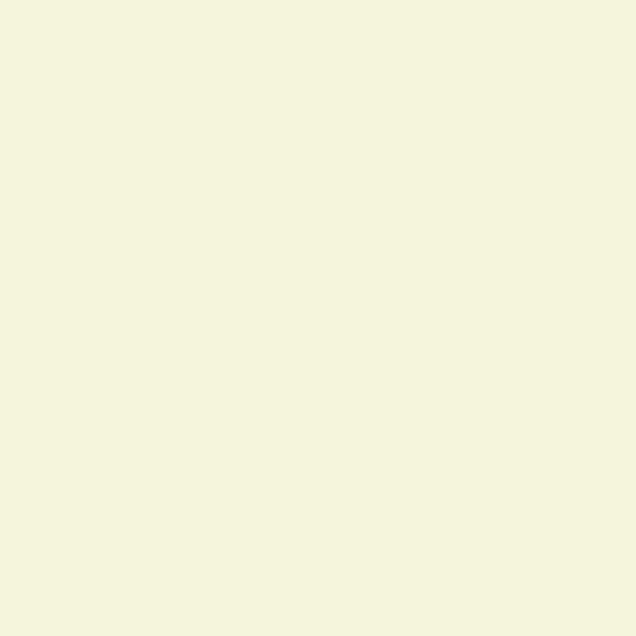

In [11]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [16]:
# in pc_utils
pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
                            rearrangement1.init_scene,
                            mcts.rearr_action.scene_mngr.scene,
                            mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                            )
# in pc_utils
table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# in pc_utils
all_pc = np.vstack([pc, table_point_cloud])
all_color = np.vstack([pc_color, table_color])

# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

mcts.rearr_action.scene_mngr.scene.objs


{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.63272172 0.09050348 0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.91802109 -0.06989906  0.87515735]),
 'can0': Object(name=can0, pos=[ 0.45938771 -0.17183809  0.85059666]),
 'can1': Object(name=can1, pos=[ 0.54357991 -0.00305534  0.85059666]),
 'milk0': Object(name=milk0, pos=[ 0.63904673 -0.01118321  0.87809554]),
 'cereal0': Object(name=cereal0, pos=[0.4698704  0.03752183 0.88526188]),
 'table_current': Object(name=table_current, pos=[ 1.36531078 -0.01756012  0.043     ]),
 'ben_cube0_current': Object(name=ben_cube0_current, pos=[0.6371992  0.11692505 0.83529998]),
 'bottle0_current': Object(name=bottle0_current, pos=[ 0.91802109 -0.06989906  0.87515735]),
 'can0_current': Object(name=can0_current, pos=[ 0.76969301 -0.16822959  0.85059666]),
 'can1_current': Object(name=can1_current, pos=[ 0.67012193 -0.00803737  0.85059666]),
 'milk0_current': Object(name=milk0_current, pos

In [16]:
current_node

{'depth': 4,
 'state': <pytamp.scene.scene.Scene at 0x7f81ae874610>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'can0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[ 0.39761998,  0.91755019,  0.        ,  0.79620628],
           [-0.91755019,  0.39761998,  0.        ,  0.16987803],
           [ 0.        ,  0.        ,  1.        ,  0.85059666],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 8.706349206349206,
 'value_history': [8.706349206349206],
 'visit': 1,
 'number': 1984,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'success': False,
 'cost': 0,
 'test': ()}

In [19]:
current_node['action']['grasp_poses'] = grasps

In [20]:
current_node

{'depth': 4,
 'state': <pytamp.scene.scene.Scene at 0x7f81ae874610>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'can0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[ 0.39761998,  0.91755019,  0.        ,  0.79620628],
           [-0.91755019,  0.39761998,  0.        ,  0.16987803],
           [ 0.        ,  0.        ,  1.        ,  0.85059666],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}],
  'grasp_poses': array([[[-0.60195255,  0.66846953, -0.43680845,  0.50559063],
          [ 0.79221576,  0.43125859, -0.43175253, -0.12510549],
          [-0.10023597, -0.60594108, -0.78916934,  0.94641296],
          [ 0.        ,  0.        ,  0.        ,  1.        ]],
  
         [[ 0.32590679,  0.69888498, -0.63666687,  0.52760581],
          [ 0.91992766, -0.38971096,  0.04311142, -0.17677215],
          [-0.21798615, -0.59973776, -0.76993302,  0.96127324],
          [ 0.        ,  0.        ,  0.        ,  1.        ]],
  
         [[-0.67966924

In [21]:
mcts.tree.nodes[max_value_nodes[2*i + 1]]

{'depth': 4,
 'state': <pytamp.scene.scene.Scene at 0x7f81ae874610>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'can0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[ 0.39761998,  0.91755019,  0.        ,  0.79620628],
           [-0.91755019,  0.39761998,  0.        ,  0.16987803],
           [ 0.        ,  0.        ,  1.        ,  0.85059666],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}],
  'grasp_poses': array([[[-0.60195255,  0.66846953, -0.43680845,  0.50559063],
          [ 0.79221576,  0.43125859, -0.43175253, -0.12510549],
          [-0.10023597, -0.60594108, -0.78916934,  0.94641296],
          [ 0.        ,  0.        ,  0.        ,  1.        ]],
  
         [[ 0.32590679,  0.69888498, -0.63666687,  0.52760581],
          [ 0.91992766, -0.38971096,  0.04311142, -0.17677215],
          [-0.21798615, -0.59973776, -0.76993302,  0.96127324],
          [ 0.        ,  0.        ,  0.        ,  1.        ]],
  
         [[-0.67966924

In [14]:
grasps

array([[[-0.60195255,  0.66846953, -0.43680845,  0.50559063],
        [ 0.79221576,  0.43125859, -0.43175253, -0.12510549],
        [-0.10023597, -0.60594108, -0.78916934,  0.94641296],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.32590679,  0.69888498, -0.63666687,  0.52760581],
        [ 0.91992766, -0.38971096,  0.04311142, -0.17677215],
        [-0.21798615, -0.59973776, -0.76993302,  0.96127324],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[-0.67966924, -0.7270003 , -0.09757245,  0.46996573],
        [-0.72732806,  0.6851896 , -0.03884785, -0.16951614],
        [ 0.09509802,  0.04456349, -0.99446999,  0.96822069],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.14885585, -0.7602935 , -0.63229403,  0.52348739],
        [-0.98058605, -0.19602889,  0.0048608 , -0.17330471],
        [-0.12764361,  0.61929515, -0.7747133 ,  0.9560376 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],



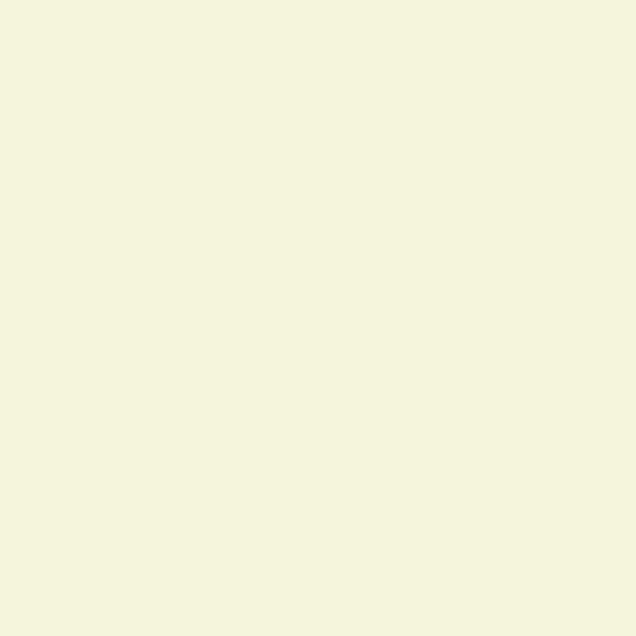

In [17]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

# for grasps in pred_grasps_world_augment[obj_to_manipulate] :
#     mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps)
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
gg.action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
gg.action.show()

In [18]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# all_pc = np.vstack([combined_pc, table_point_cloud])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(obj_to_manipulate)
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)
pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)

# Set point size and color
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

bottle0


# Change Point clouds from world coord to camera coord

In [19]:
from pykin.utils.transform_utils import get_inverse_homogeneous

# # in pytamp 
# T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
#          1.60000008e-01],
#        [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
#          6.34369494e-01],
#        [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
#          1.63132538e+00],
#        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
#          1.00000000e+00]])

# w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
# w_T_cam = w_T_cam.dot(
#             trimesh.transformations.euler_matrix(np.pi, 0, 0)
#         )

# cam_T_w = get_inverse_homogeneous(w_T_cam)
# ones_arr = np.full((len(all_pc), 1), 1)
# w_pc = np.hstack((all_pc, ones_arr))

# cam_pc =  np.dot(cam_T_w, w_pc.T).T

# # next_pc_segment도 변경해줘 
# ones_arr = np.full((len(pc_segments[obj_to_manipulate]), 1), 1)
# w_pc = np.hstack((pc_segments[obj_to_manipulate], ones_arr))

# pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T
cam_pc, pc_segments = gg.get_pc_from_camera_point_of_view(all_pc, pc_segments, obj_to_manipulate)


In [20]:
pc_segments, cam_pc.shape, pc_segments[obj_to_manipulate].shape


({'bottle0': array([[-0.10623324,  0.31555113,  0.77242551,  1.        ],
         [-0.12426552,  0.27674718,  0.80146252,  1.        ],
         [-0.09149931,  0.3209604 ,  0.8160915 ,  1.        ],
         ...,
         [-0.12359207,  0.26694495,  0.72561365,  1.        ],
         [-0.10689017,  0.28482622,  0.8312147 ,  1.        ],
         [-0.0808308 ,  0.29627522,  0.76207774,  1.        ]])},
 (39000, 4),
 (3000, 4))

## Manipulation 하고싶은 object에 대해서만 Cube 생성함. 

In [21]:
import numpy as np
import trimesh

# pc_regions, _ = gg.grasp_estimator.extract_3d_cam_boxes(cam_pc[:,:3], pc_segments, min_size=0.4)
# pc_region_1 = pc_regions[obj_to_manipulate]

############
pc_region_1 = gg.get_region_to_manipulate(cam_pc[:,:3], pc_segments, min_size=0.4, obj_name=obj_to_manipulate)

colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# Home
rand_xy = np.random.random((100,3))/100
# z = np.ones((10,1))*0.8
# rand_xy = np.hstack([rand_xy,z])
pc_region_test = trimesh.points.PointCloud(np.vstack([pc_region_1, rand_xy]),  colors=colors)

scene = trimesh.Scene(pc_region_test)

# print(pc_regions[obj_to_manipulate].shape, obj_to_manipulate)
scene.point_size=2.0
scene.show()


Extracted Region Cube Size:  0.4


In [24]:
# all_pc = cam_pc[:,:3]
# print(all_pc.shape, pc_regions[obj_to_manipulate].shape, obj_to_manipulate)

pred_grasps_cam, scores, contact_pts, gripper_openings = {}, {}, {}, {}

pred_grasps_cam, scores, contact_pts, gripper_openings = gg.generate_grasp(pc_region_1, pc_segments[obj_to_manipulate], obj_to_manipulate)

Generated 104 grasps for object bottle0


# generate grasp on obj_to_manipulation

In [25]:
# forward_passes = 1
# filter_grasps = True 
# local_regions = True 
# # for name_ in pc_segments.keys():
# #     pred_grasps_cam[name_], scores[name_], contact_pts[name_], gripper_openings[name_] = gg.grasp_estimator.predict_grasps(gg.sess, pc_regions[obj_to_manipulate], convert_cam_coords=True, forward_passes=forward_passes)

# pred_grasps_cam[obj_to_manipulate], scores[obj_to_manipulate], contact_pts[obj_to_manipulate], gripper_openings[obj_to_manipulate] = gg.grasp_estimator.predict_grasps(gg.sess, pc_regions[obj_to_manipulate], convert_cam_coords=True, forward_passes=forward_passes)

# filter grasps

In [26]:
# segment_keys = contact_pts.keys()
# print(contact_pts[obj_to_manipulate].shape)
# for k in segment_keys:
#     if np.any(pc_regions[k]) and np.any(contact_pts[k]):
#         segment_idcs = gg.grasp_estimator.filter_segment(contact_pts[k], pc_segments[k], thres=0.005)
        
#         pred_grasps_cam[k] = pred_grasps_cam[k][segment_idcs]
#         scores[k] = scores[k][segment_idcs]
#         contact_pts[k] = contact_pts[k][segment_idcs]        
#         try:
#             gripper_openings[k] = gripper_openings[k][segment_idcs]
#         except:
#             print('skipped gripper openings {}'.format(gripper_openings[k]))
#         if local_regions and np.any(pred_grasps_cam[k]):
#             print('Generated {} grasps for object {}'.format(len(pred_grasps_cam[k]), k))            
#     else:
#         print('skipping obj {} since  np.any(pc_segments[k]) {} and np.any(contact_pts[j]) is {}'.format(k, np.any(pc_regions[k]), np.any(contact_pts[j])))
        
        


In [27]:
# test_ = {}
# test_score = {}
# idx = np.where(scores[obj_to_manipulate]>0.3)
# test_[obj_to_manipulate] = pred_grasps_cam[obj_to_manipulate][idx]
# test_score[obj_to_manipulate] = scores[obj_to_manipulate][idx]

In [28]:
visualize_grasps(
            cam_pc, pred_grasps_cam, scores, plot_opencv_cam=True, pc_colors=all_color
        )
# visualize_grasps(
#             all_pc, test_, test_score, plot_opencv_cam=True, pc_colors=all_color
#         )

Visualizing...takes time


# Change camera coord to world coord 

생성된 grasp은 camera coord 기준으로 생성되어 있음. 즉, cam_T_g

이를 world coord 기준으로 바꿔야함. -> w_T_cam * cam_T_g

In [29]:
# from pytamp.utils.heuristic_utils import get_heuristic_eef_pose

# def collision_check_using_contact_graspnet(pred_grasps):
#     collision_free_grasps = []
#     for grasps in pred_grasps:
#         mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#         if not mcts.rearr_action._collide(is_only_gripper=True):
#             collision_free_grasps.append(grasps)
     
#     return np.array(collision_free_grasps)


# pred_grasps_world = {}
# pred_grasps_world_augment = {}
# pred_grasps_cam_augment = {}
# collision_free_grasps = [] 
# # Z축으로 90도 돌려야함. 
# z_90_matrix = np.array([[0,-1,0,0],
#                         [1,0,0,0],
#                         [0,0,1,0],
#                         [0,0,0,1]])

# pred_grasps_cam_augment[obj_to_manipulate] = pred_grasps_cam[obj_to_manipulate] @ z_90_matrix

# # Next scene 기준으로 바꾸긴 했음...!! 
# pred_grasps_world[obj_to_manipulate] = w_T_cam @ pred_grasps_cam[obj_to_manipulate]
# print("Generated Grasp in world coord :", pred_grasps_world[obj_to_manipulate].shape)

# # Collision check using only pred_result not consider augment
# collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world[obj_to_manipulate])
# print("Collision free grasps step 1 : ", collision_free_grasps.shape)

# if not len(collision_free_grasps):
#     pred_grasps_world_augment[obj_to_manipulate] = w_T_cam @ pred_grasps_cam_augment[obj_to_manipulate]
#     print("Augment 1 _z axis 90' rotation ", pred_grasps_world_augment[obj_to_manipulate].shape, pred_grasps_world[obj_to_manipulate].shape)
    
#     collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
#     print("Collision free grasps step 2 : ", collision_free_grasps.shape)
    
    
# augmented_grasps = []
# if not len(collision_free_grasps):
#     pred_grasps_world_augment[obj_to_manipulate] = np.vstack([pred_grasps_world_augment[obj_to_manipulate], pred_grasps_world[obj_to_manipulate]])
#     for grasps in pred_grasps_world_augment[obj_to_manipulate]:
#         mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#         tcp_pose = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose()

#         for tcp_pose_ in get_heuristic_eef_pose(tcp_pose):
#             eef_pose_ = mcts.rearr_action.scene_mngr.scene.robot.gripper.compute_eef_pose_from_tcp_pose(tcp_pose_)
#             mcts.rearr_action.scene_mngr.set_gripper_pose(eef_pose_)
#             augmented_grasps.append(eef_pose_)

# if augmented_grasps:
#     augmented_grasps = np.array(augmented_grasps)
#     print("Augment 2 y axis rotation from -pi/3 ~ pi/3 : ", augmented_grasps.shape)
#     pred_grasps_world_augment[obj_to_manipulate] = augmented_grasps
    
#     collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
#     print("Collision free grasps step 3 : ", collision_free_grasps.shape)


collision_free_grasps = gg.change_grasp_to_world_coord(pred_grasps_cam, obj_to_manipulate)

Generated Grasp in world coord : (104, 4, 4)
Collision free grasps step 1 :  (33, 4, 4)


In [30]:
collision_free_grasps

array([[[ 0.1180795 , -0.86111401,  0.49450968,  0.86515891],
        [-0.99264354, -0.08893844,  0.08215135, -0.08032895],
        [-0.02676086, -0.50057225, -0.86528098,  1.04037401],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.81286496,  0.43674668, -0.38536146,  0.95402203],
        [ 0.5492422 , -0.7949807 ,  0.25756234, -0.08984161],
        [-0.19386451, -0.42102016, -0.88609161,  1.05678594],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.47925575,  0.62974271,  0.61134122,  0.84953485],
        [ 0.87331748, -0.2728391 , -0.40357825, -0.02516633],
        [-0.08735268,  0.72731214, -0.68072505,  1.01809162],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[-0.97852873,  0.17312664,  0.11184223,  0.9045769 ],
        [ 0.19078372,  0.96615183,  0.17364408, -0.08326202],
        [-0.07799418,  0.19125341, -0.97843706,  1.05159154],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],



# Visualize predicted grasps on next_scene 

In [ ]:
# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# # mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

# for grasps in pred_grasps_world_augment[obj_to_manipulate] :
#     mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

# Get Mixed Scene for Collision check 

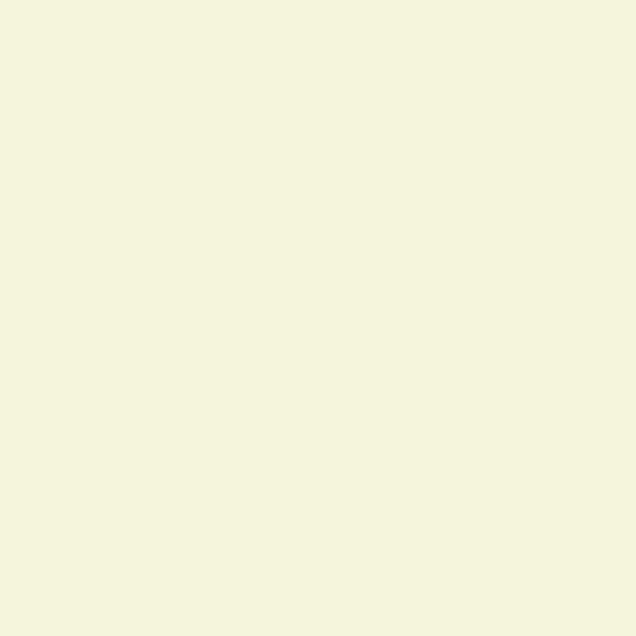

In [31]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
c = 0 
n = 0 

for grasps in collision_free_grasps:
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasps)


mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

# print('Not collid : ', len(collision_free_grasps), "Collide :", len(augmented_grasps) - len(collision_free_grasps) )

# Collision check on the synthetic scene

In [32]:
for name in mcts.rearr_action.scene_mngr.scene.objs:
    print(name)


table
ben_cube0
bottle0
can0
can1
milk0
cereal0
table_current
ben_cube0_current
bottle0_current
can0_current
can1_current
milk0_current
cereal0_current


# Remove some objects in synthetic scene

In [33]:
mcts.rearr_action.remove_mixed_scene()

In [34]:
gg.action.remove_mixed_scene()

In [26]:
for i in mcts.rearr_action.scene_mngr.scene.objs:
    print(i)

table
ben_cube0
bottle0
can0
can1
milk0
cereal0


In [ ]:
from pykin.utils.transform_utils import get_inverse_homogeneous

T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
         1.60000008e-01],
       [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
         6.34369494e-01],
       [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.63132538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
w_T_cam = w_T_cam.dot(
            trimesh.transformations.euler_matrix(np.pi, 0, 0)
        )

cam_T_w = get_inverse_homogeneous(w_T_cam)
ones_arr = np.full((len(all_pc), 1), 1)
w_pc = np.hstack((all_pc, ones_arr))

cam_pc =  np.dot(cam_T_w, w_pc.T).T

# next_pc_segment도 변경해줘 
ones_arr = np.full((len(next_pc_segments[obj_to_manipulate]), 1), 1)
w_pc = np.hstack((next_pc_segments[obj_to_manipulate], ones_arr))

next_pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T
